In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
len(train_images)

60000

In [5]:
len(train_labels)

60000

In [6]:
len(test_images)

10000

In [7]:
len(test_labels)

10000

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot'] # for ourself
# same sequence in tensor flow

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

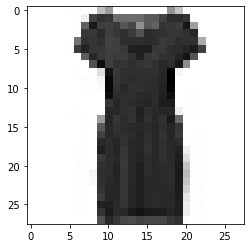

In [11]:
plt.imshow(train_images[20], cmap = plt.cm.binary)
plt.show()

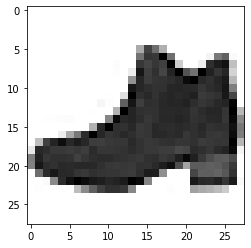

In [12]:
plt.imshow(train_images[15], cmap = plt.cm.binary)
plt.show()

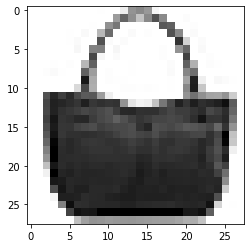

In [13]:
plt.imshow(train_images[100], cmap = plt.cm.binary)
plt.show()

In [14]:
# Now Scaling/Normalizing  b/w 0-1
# without libray

train_images = train_images/255.0
test_images = test_images/255.0

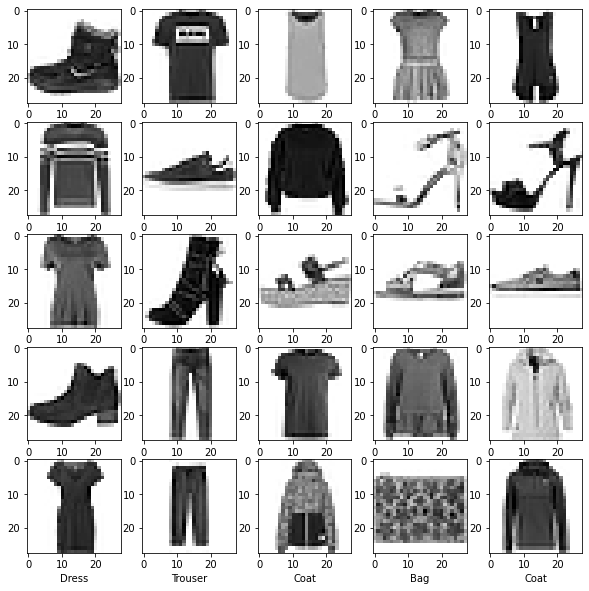

In [15]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1) # subplot means in 1 graph and 5,5 means 5 image in 1 row(5 rows 5 columns)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

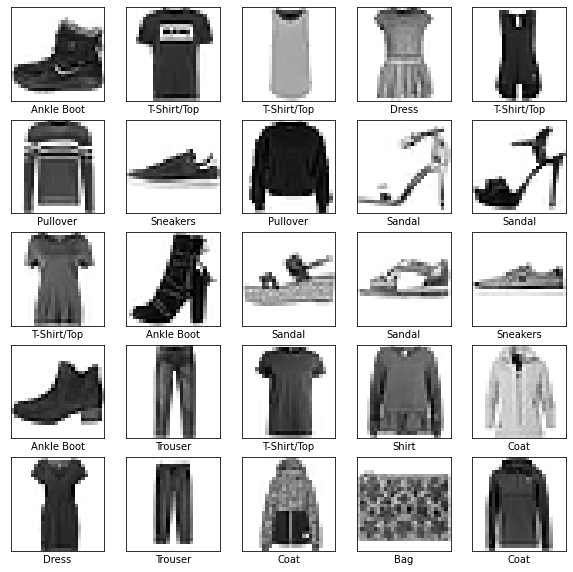

In [16]:
# we are removing numbering (Dimesions)
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1) # subplot means in 1 graph and 5,5 means 5 image in 1 row(5 rows 5 columns)
  #plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(784, activation = 'relu')) # hidden Layer
model.add(tf.keras.layers.Dense(600, activation = 'relu')) # hidden Layer
model.add(tf.keras.layers.Dense(64, activation = 'relu')) # Hidden layer
model.add(tf.keras.layers.Dense(10, activation = 'softmax')) # output layer

In [18]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4827 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3637 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3274 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3012 - accuracy: 0.8891
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2827 - accuracy: 0.8942
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2687 - accuracy: 0.8994
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2547 - accuracy: 0.9041
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2468 - accuracy: 0.9076
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2327 - accuracy: 0.9124
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8805
0.36018136143684387 0.8805000185966492


In [21]:
prediction = model.predict(test_images)

In [22]:
prediction

array([[6.6613619e-14, 5.4606164e-09, 5.3252102e-15, ..., 2.8951943e-04,
        9.2946209e-08, 9.9937952e-01],
       [6.5490990e-06, 3.4908806e-14, 9.9984062e-01, ..., 4.5522883e-22,
        1.4973731e-11, 2.4806886e-22],
       [2.9546924e-20, 1.0000000e+00, 5.6285567e-28, ..., 0.0000000e+00,
        1.8960662e-24, 0.0000000e+00],
       ...,
       [3.3190611e-04, 9.5208748e-09, 3.7467171e-07, ..., 1.0671749e-11,
        9.9956030e-01, 4.3461225e-13],
       [2.4036663e-15, 1.0000000e+00, 2.7958795e-19, ..., 7.5368158e-35,
        1.0494033e-15, 1.6587110e-26],
       [4.3883078e-10, 1.0413625e-14, 7.0933529e-15, ..., 1.8292632e-06,
        3.9964019e-09, 6.9174755e-09]], dtype=float32)

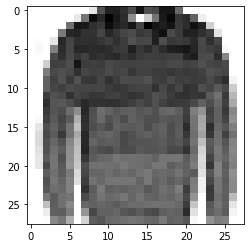

In [24]:
plt.imshow(test_images[20], cmap = plt.cm.binary)
plt.show()

In [25]:
np.argmax(prediction[20]) 

2

In [33]:
test_labels[20]

2

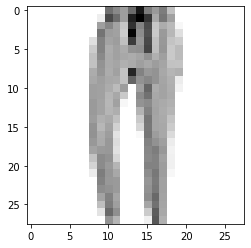

In [27]:
plt.imshow(test_images[80], cmap = plt.cm.binary)
plt.show()

In [28]:
np.argmax(prediction[80]) 

1

In [32]:
test_labels[80]

1